# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# url for Open Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid":weather_api_key,
    "units":"imperial"    
}

# city container list
city_data = []

In [19]:
# Print Log of Each City
print("---------------------------------")
print(" ")
print("     START:  CITY WEATHER CHECK ")
print(" ")
print("---------------------------------")

# counter list
set_counter = 1
record_counter = 1

for city in cities:
    params["q"] = city
    response = requests.get(url, params=params)
    # when looping through, skip if city isn't found
    if response.ok == False:
        print(" City not found.   Skipping...")
        time.sleep(1)
        pass
    else:    
        response_json = response.json()
        weather_dict = {
            "City":response_json["name"], 
            "Country":response_json["sys"]["country"],
            "Date":response_json["dt"],
            "Latitude":response_json["coord"]["lat"],
            "Longitude":response_json["coord"]["lon"],
            "Cloudiness":response_json["clouds"]["all"],
            "Humidity":response_json["main"]["humidity"],
            "Max Temp":response_json["main"]["temp_max"],
            "Wind Speed":response_json["wind"]["speed"]
        }
        city_data.append(weather_dict)
        print(f"Processing Record {record_counter} of Set {set_counter} | {weather_dict['City']}")
        record_counter += 1

        #utilize the counter
        if record_counter % 50 == 0:
            set_counter += 1
            record_counter = 1

print("---------------------------------")
print(" ")
print("     END:  CITY WEATHER CHECK ")
print(" ")
print("---------------------------------")

---------------------------------
 
     START:  CITY WEATHER CHECK 
 
---------------------------------
Processing Record 1 of Set 1 | Mar del Plata
Processing Record 2 of Set 1 | Vygonichi
Processing Record 3 of Set 1 | Marshall
Processing Record 4 of Set 1 | Guerrero Negro
Processing Record 5 of Set 1 | Severo-Kuril'sk
 City not found.   Skipping...
Processing Record 6 of Set 1 | Hobart
Processing Record 7 of Set 1 | Butaritari
Processing Record 8 of Set 1 | Vetluga
Processing Record 9 of Set 1 | Hithadhoo
Processing Record 10 of Set 1 | Mataura
Processing Record 11 of Set 1 | Rikitea
Processing Record 12 of Set 1 | Kodiak
Processing Record 13 of Set 1 | Vaini
Processing Record 14 of Set 1 | Bethel
Processing Record 15 of Set 1 | Myaundzha
Processing Record 16 of Set 1 | Namatanai
Processing Record 17 of Set 1 | Marzuq
Processing Record 18 of Set 1 | College
Processing Record 19 of Set 1 | Bontang
 City not found.   Skipping...
Processing Record 20 of Set 1 | Boende
Processing Recor

Processing Record 38 of Set 4 | Bandarbeyla
Processing Record 39 of Set 4 | Faya
Processing Record 40 of Set 4 | La Paz
Processing Record 41 of Set 4 | Ngunguru
Processing Record 42 of Set 4 | Simpsonville
Processing Record 43 of Set 4 | Fomboni
Processing Record 44 of Set 4 | Tadine
Processing Record 45 of Set 4 | Opuwo
 City not found.   Skipping...
Processing Record 46 of Set 4 | New Norfolk
Processing Record 47 of Set 4 | Dongkan
Processing Record 48 of Set 4 | Praia da Vitoria
Processing Record 49 of Set 4 | Lethem
 City not found.   Skipping...
Processing Record 1 of Set 5 | Jiwani
Processing Record 2 of Set 5 | Nome
Processing Record 3 of Set 5 | Plettenberg Bay
 City not found.   Skipping...
Processing Record 4 of Set 5 | Comodoro Rivadavia
Processing Record 5 of Set 5 | Gambela
Processing Record 6 of Set 5 | Palmer
Processing Record 7 of Set 5 | Balkanabat
 City not found.   Skipping...
Processing Record 8 of Set 5 | Chokurdakh
 City not found.   Skipping...
Processing Record 

Processing Record 29 of Set 8 | Ukwa
Processing Record 30 of Set 8 | Poronaysk
Processing Record 31 of Set 8 | İstisu
Processing Record 32 of Set 8 | Longyearbyen
Processing Record 33 of Set 8 | Woodbridge
Processing Record 34 of Set 8 | Kiryat Gat
Processing Record 35 of Set 8 | Provideniya
Processing Record 36 of Set 8 | Lavrentiya
Processing Record 37 of Set 8 | Touros
Processing Record 38 of Set 8 | Kargopol
Processing Record 39 of Set 8 | Porto Velho
Processing Record 40 of Set 8 | Sur
Processing Record 41 of Set 8 | Bubaque
 City not found.   Skipping...
Processing Record 42 of Set 8 | Mehran
Processing Record 43 of Set 8 | Encruzilhada
Processing Record 44 of Set 8 | Aksarka
Processing Record 45 of Set 8 | San Juan
Processing Record 46 of Set 8 | Krasnosel'kup
Processing Record 47 of Set 8 | Havre-Saint-Pierre
Processing Record 48 of Set 8 | Harper
Processing Record 49 of Set 8 | Mahibadhoo
Processing Record 1 of Set 9 | Broome
Processing Record 2 of Set 9 | Monterrey
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Dataframe
city_pd = pd.DataFrame(city_data)

lat = city_pd["Latitude"]
maxtemp = city_pd["Max Temp"]
hum = city_pd["Humidity"]
winds = city_pd["Wind Speed"]
clouds = city_pd["Cloudiness"]

# Display Dataframe
city_pd.to_csv(output_data_file, index_label="City_ID")
city_pd.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,Mar del Plata,AR,1579311869,-38.00,-57.56,0,68,66.99,9.17
1,Vygonichi,RU,1579312509,53.10,34.07,17,97,28.00,4.38
2,Marshall,US,1579312509,34.38,-86.33,1,43,55.40,10.29
3,Guerrero Negro,MX,1579312047,27.98,-114.06,8,76,58.39,9.95
4,Severo-Kuril'sk,RU,1579311954,50.68,156.12,99,84,17.69,19.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

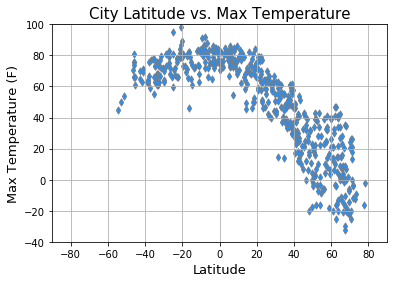

In [22]:
plt.scatter(lat,
            maxtemp,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25,
            alpha=0.99)
plt.title("City Latitude vs. Max Temperature", fontsize=15);
plt.xlabel("Latitude", fontsize=13);
plt.ylabel("Max Temperature (F)", fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-40, 100);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_Temp.png");
plt.show()

#### Latitude vs. Humidity Plot

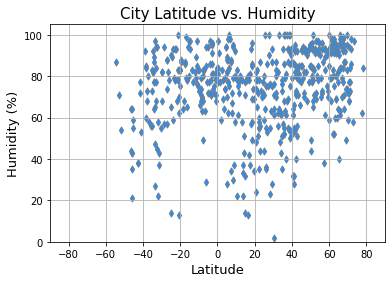

In [23]:
plt.scatter(lat,
            hum,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25,
            alpha=0.99)
plt.title("City Latitude vs. Humidity", fontsize=15);
plt.xlabel("Latitude", fontsize=13);
plt.ylabel("Humidity (%)", fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-0, 105);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_Humidity.png");
plt.show()

#### Latitude vs. Cloudiness Plot

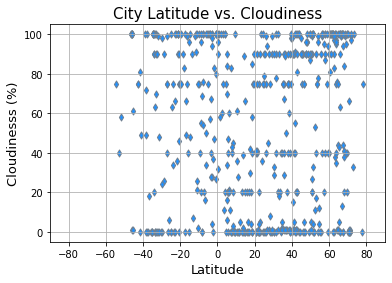

In [24]:
plt.scatter(lat,
            clouds,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25, 
            alpha=0.99)
plt.title("City Latitude vs. Cloudiness", fontsize=15);
plt.xlabel("Latitude",fontsize=13);
plt.ylabel("Cloudinesss (%)",fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-5, 105);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_Cloudiness.png");
plt.show()

#### Latitude vs. Wind Speed Plot

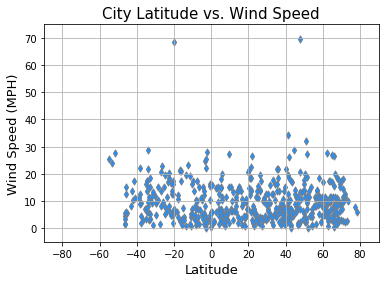

In [25]:
plt.scatter(lat,
            winds,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25, 
            alpha=0.99)
plt.title("City Latitude vs. Wind Speed", fontsize=15);
plt.xlabel("Latitude", fontsize=13);
plt.ylabel("Wind Speed (MPH)", fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-5, 75);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_WindSpeed.png");
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression